In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import slab_workflow
from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import gplately
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import pygplates
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['lines.solid_capstyle'] = 'round'
mpl.rcParams['lines.solid_joinstyle'] = 'round'
mpl.rc('font', family='sans-serif') 
mpl.rc('font', serif='Helvetica Neue') 
mpl.rc('text', usetex='false') 
mpl.rcParams.update({'font.size': 8})
from cmcrameri import cm

#from slabdip import SlabDipper

In [2]:
# Peridotite densities
perid_density_g_cm3 = 3.3
perid_density_g_km3 = perid_density_g_cm3 * 100000**3
perid_density_g_m3 = perid_density_g_cm3 * 100**3
perid_density_kg_km3 = perid_density_g_km3 * 1e-3
perid_density_kg_m3 = perid_density_g_m3 * 1e-3

# H2 per reactant
H2_kg_per_m3 = 0.2
H2_kg_per_km3 = H2_kg_per_m3 * 1e9

In [3]:
# set directories

# Call GPlately's DataServer object and download the plate model
gdownload = gplately.download.DataServer("Muller2016")
rotation_model = pygplates.RotationModel('./data/plate_model/Global_EarthByte_230-0Ma_GK07_AREPS.rot')
topology_features = ['./data/plate_model/Global_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpml',
                      './data/plate_model/Global_EarthByte_230-0Ma_GK07_AREPS_PlateBoundaries.gpml']
static_polygons = pygplates.FeatureCollection('./data/plate_model/Global_EarthByte_230-0Ma_GK07_AREPS_Coastlines.gpml')

# Use the PlateReconstruction object to create a plate motion model
model = gplately.PlateReconstruction(rotation_model, topology_features, static_polygons)

# Obtain geometry shapefiles with gdownload
coastlines, continents, COBs = gdownload.get_topology_geometries()

holocene_volcanos = pd.read_csv('./data/GVP_Volcano_List_Holocene.csv', header=1)

/Users/andrew/Documents/GitHub/gplately/gplately/pygplates.py:192: ImportWarning: 
RotationModel: No filename associated with <class 'pygplates.pygplates.RotationModel'> in __init__
 ensure pygplates is imported from gplately. Run,
 from gplately import pygplates
  _warnings.warn(msg, ImportWarning)
100%|█████████████████████████████████████| 6.37M/6.37M [00:00<00:00, 7.93GB/s]
SHA256 hash of downloaded file: e8da46d3f13bd3c1260330f4b89d5af562a29953eb1009207059e5bc1570011a
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
Unzipping contents of '/Users/andrew/Library/Caches/gplately/Muller2016' to '/Users/andrew/Library/Caches/gplately/Muller2016.unzip'


Requested files downloaded to the GPlately cache folder!
No continents in Muller2016.


In [4]:
with open('./data/subduction_tracks_2022-09-14.pickle', 'rb') as f:
    tracks = pickle.load(f)
    
#syracuse table
df_syracuse = pd.read_csv('./data/Table_2_sub_parameters.csv')

In [17]:
# Obtain features for the PlotTopologies object with DataServer
coastlines, continents, COBs = gdownload.get_topology_geometries()
#coastlines = './data/plate_model/Global_EarthByte_230-0Ma'
time = 0
# Call the PlotTopologies object
gplot = gplately.plot.PlotTopologies(model, coastlines=coastlines,
                                      continents=continents, COBs=COBs, time=time)

Checking whether the requested files need to be updated...
Requested files are up-to-date!
No continents in Muller2016.


In [18]:
variables = ['fractional_perids', 'volume_perids', 'point_conv_rates', 'point_spread_rates', 
'point_MODEL_dips', 'point_slab_ages', 'point_MODEL_depths', 'pressure_MODEL', 'temp_SYR10_MODEL']

cmaps = [cm.imola, cm.imola, cm.batlow, cm.batlow, cm.lapaz, cm.hawaii, cm.davos, cm.turku, cm.berlin]

labels = ['Peridotite fraction of slab',
           'Peridotite volume (km3)',
           'Convergence rate (mm/a)',
           'Spreading rate (mm/a)',
           'Modelled dip angle (°)',
           'Slab age (Ma)',
           'Modelled depths (km)',
           'Pressure (GPa)',
           'Temperature (°C)']

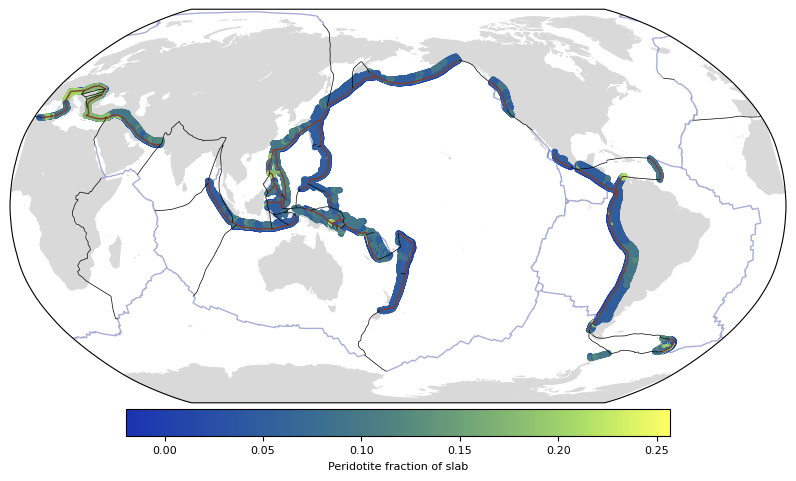

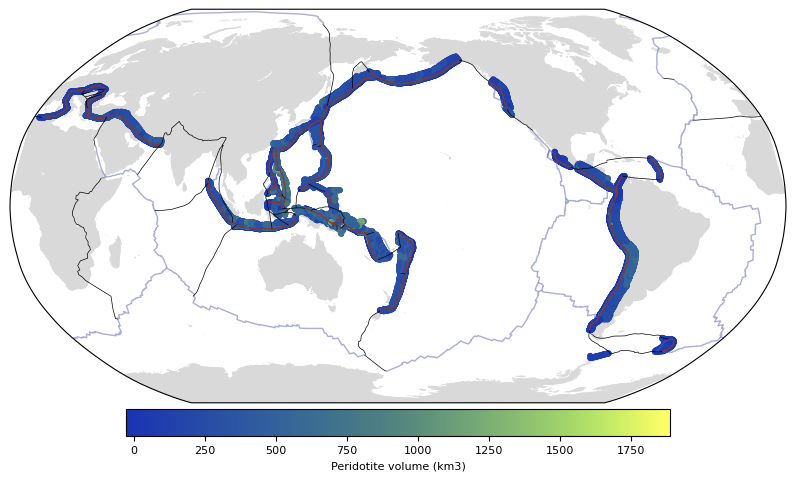

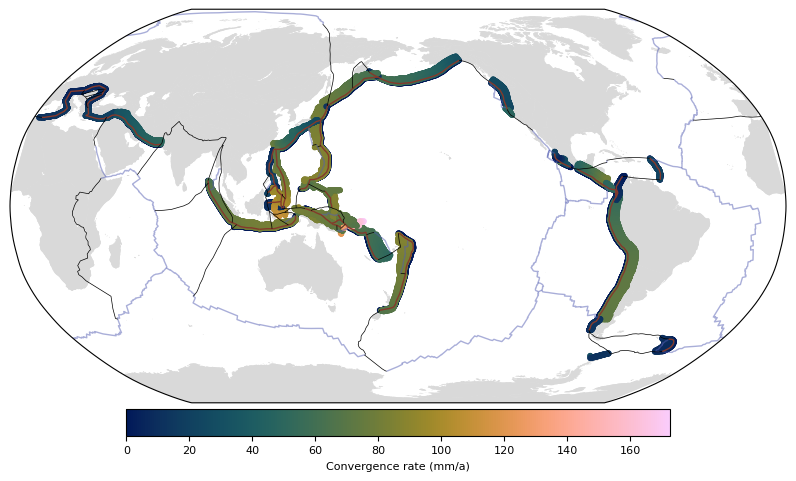

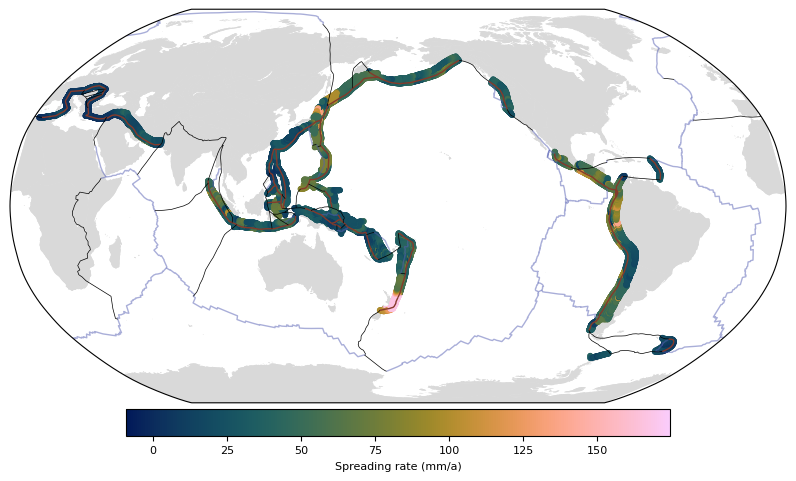

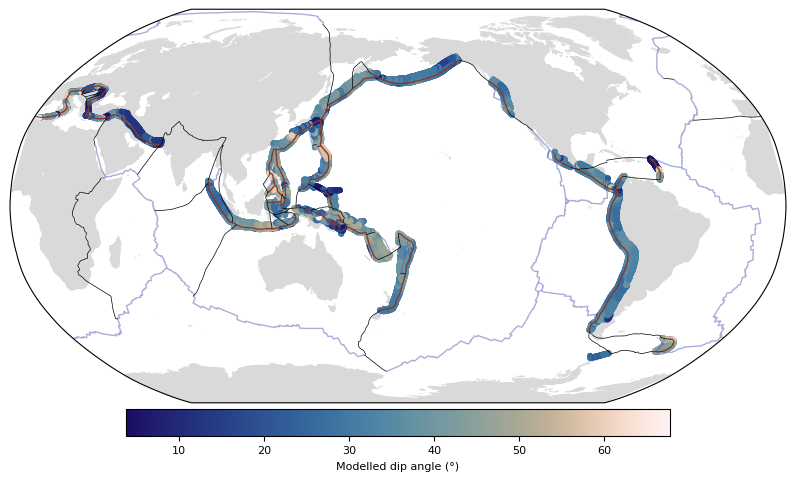

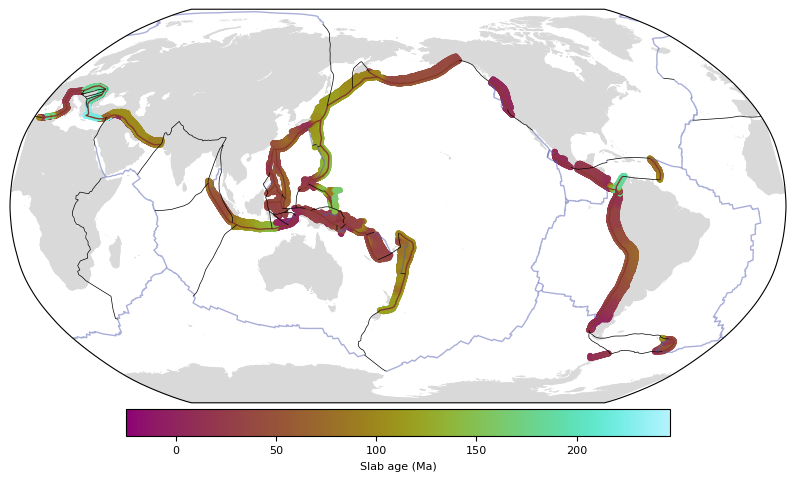

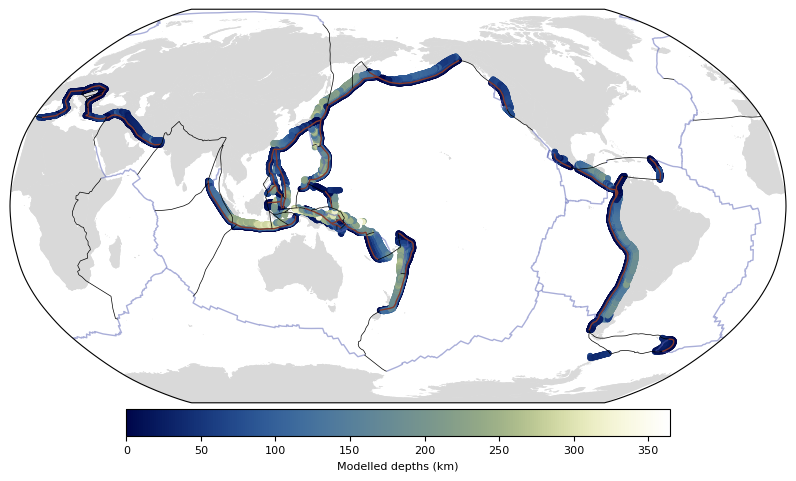

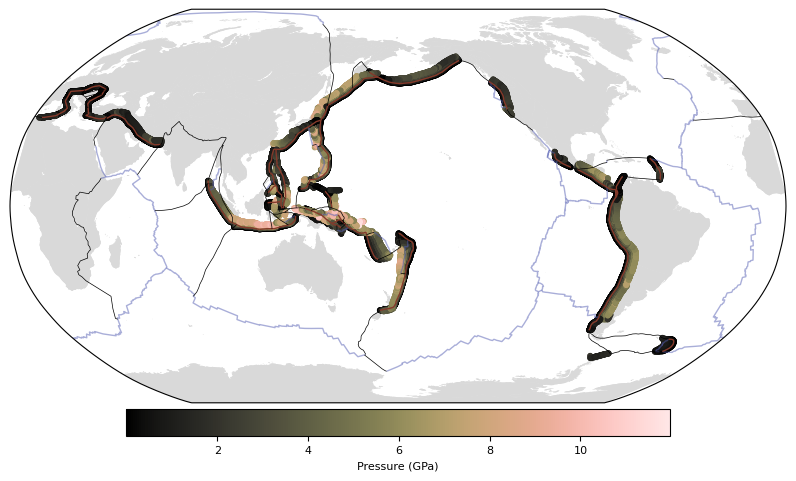

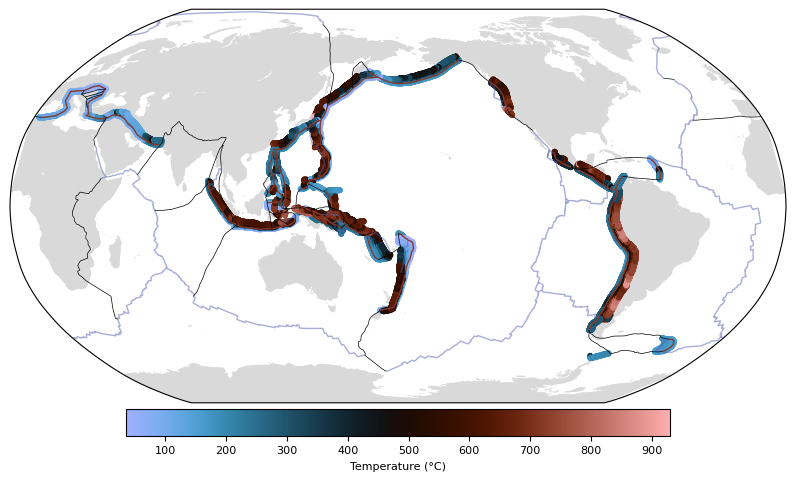

In [21]:
for ind, variable in enumerate(variables):
    fig = plt.figure(figsize=(8,6))
    ax1 = fig.add_subplot(111, projection=ccrs.Robinson(180))

    #gplot.plot_continents(ax1, facecolor='0.8')
    gplot.plot_coastlines(ax1, color='0.85')
    gplot.plot_ridges_and_transforms(ax1, lw=1, alpha=0.5, color='#545EB3')
    gplot.plot_trenches(ax1, lw=1, color='#853a2b')
    gplot.plot_misc_boundaries(ax1, lw=0.5, color='k')
    #gplot.plot_subduction_teeth(ax1, color='#853a2b')

    sc = ax1.scatter(tracks['point_lats'],
                 tracks['point_lons'],
                 c=tracks[variable],
                 s=10,
                 transform=ccrs.PlateCarree(), cmap=cmaps[ind])

    sc.set_rasterized(True)

    fig.colorbar(sc, orientation='horizontal', pad=0.01, shrink=0.7, label=labels[ind])
    fig.tight_layout()

    fig.savefig(f'./figures/global_maps/{variables[ind]}.pdf', dpi=600)

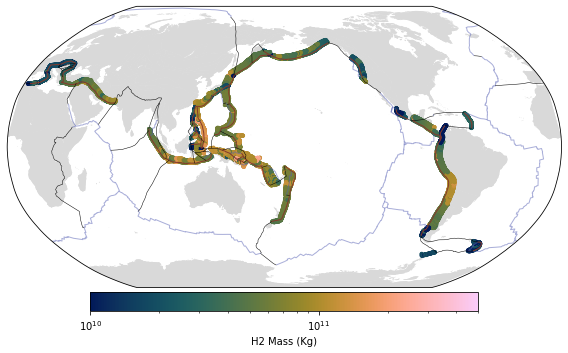

In [ ]:
import matplotlib as mpl
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111, projection=ccrs.Robinson(180))

#gplot.plot_continents(ax1, facecolor='0.8')
gplot.plot_coastlines(ax1, color='0.85')
gplot.plot_ridges_and_transforms(ax1, lw=1, alpha=0.5, color='#545EB3')
gplot.plot_trenches(ax1, lw=1, color='#853a2b')
gplot.plot_misc_boundaries(ax1, lw=0.5, color='k')
#gplot.plot_subduction_teeth(ax1, color='#853a2b')
H2_mass = np.asarray(tracks['volume_perids'].values*H2_kg_per_km3)


#H2_kg = H2_kg_per_km3 * above_antigorite_RAP_vols


sc = ax1.scatter(tracks['point_lats'],
                 tracks['point_lons'],
                 c=H2_mass,
                 s=10,
                 transform=ccrs.PlateCarree(), cmap=cm.batlow, norm=mpl.colors.LogNorm(vmin=1e10, vmax=5e11))

sc.set_rasterized(True)
#ax1.scatter(holocene_volcanos['Longitude'],
#                holocene_volcanos['Latitude'], edgecolors='k', facecolors='none', marker='^', transform=ccrs.PlateCarree())
                
fig.colorbar(sc, orientation='horizontal', pad=0.01, shrink=0.7, label='H2 Mass (Kg)')
ax1.grid()
fig.tight_layout()

fig.savefig('./figures/H2_mass.pdf')

In [22]:
# sub zones to make close ups of --> [x0, x1, y0, y1] | [lon0, lon1, lat0, lat1]
andes_bounds = np.asarray([-90, -60, -60, 10])
izu_bonin_philippines_bounds = np.asarray([110, 150, 0, 45])
sumatra_bounds = np.asarray([90, 130, -15, 15])
calabria_bounds = np.asarray([0, 30, 30, 50])
antilles_bounds = np.asarray([-65, -55, 10, 20])
SW_pacific_bounds = np.asarray([150, 200, -50, 0])
aleutian_bounds = np.asarray([150, 240, 30, 70])

In [23]:
list_of_bounds = [andes_bounds, izu_bonin_philippines_bounds, sumatra_bounds, calabria_bounds, antilles_bounds, SW_pacific_bounds, aleutian_bounds]
list_of_bounds_names = ['andes_bounds', 'izu_bonin_philippines_bounds', 'sumatra_bounds', 'calabria_bounds', 'antilles_bounds', 'SW_pacific_bounds', 'aleutian_bounds']

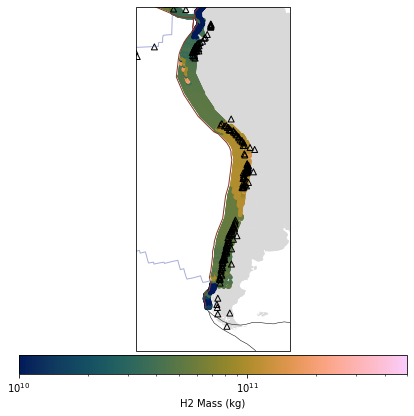

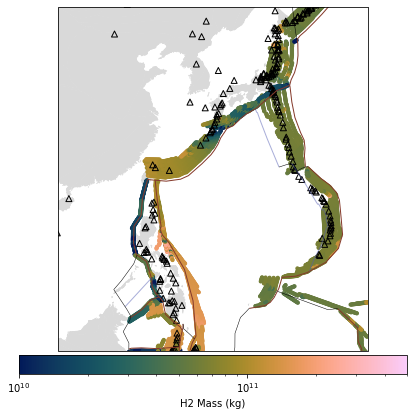

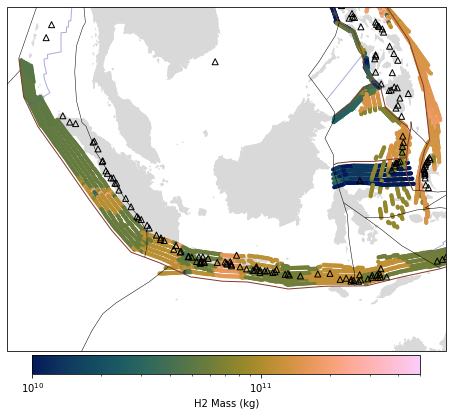

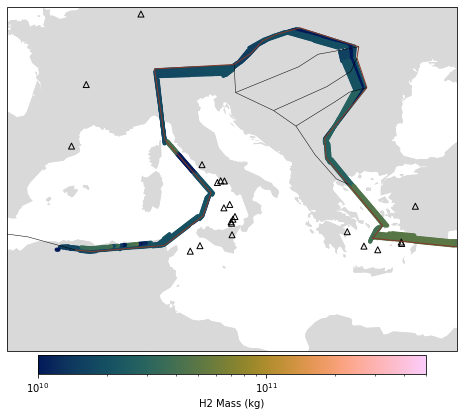

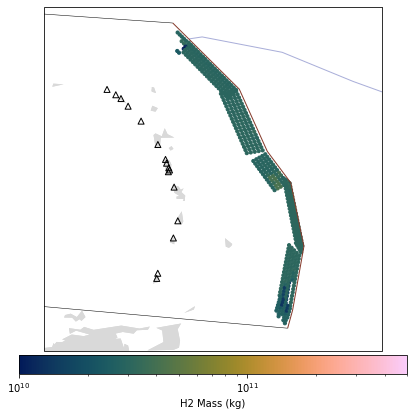

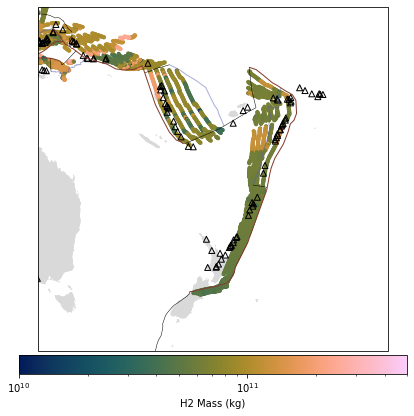

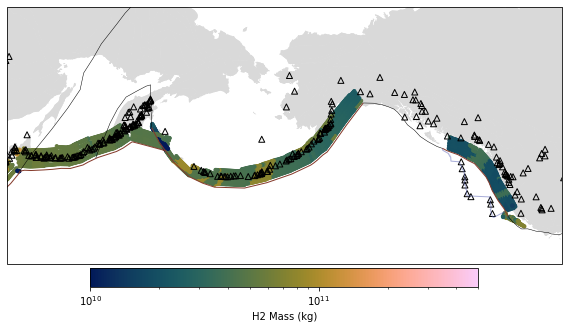

In [30]:
for ind, bounds in enumerate(list_of_bounds):
 
    fig = plt.figure(figsize=(8,6))
    ax1 = fig.add_subplot(111, projection=ccrs.Orthographic(central_latitude=np.mean(bounds[2:]),
                                                            central_longitude=np.mean(bounds[:2])))

    #gplot.plot_continents(ax1, facecolor='0.8')
    gplot.plot_coastlines(ax1, color='0.85')
    gplot.plot_ridges_and_transforms(ax1, lw=1, alpha=0.5, color='#545EB3')
    gplot.plot_trenches(ax1, lw=1, color='#853a2b')
    gplot.plot_misc_boundaries(ax1, lw=0.5, color='k')
    #gplot.plot_subduction_teeth(ax1, lw=2, color='#853a2b')
    H2_mass = np.asarray(tracks['volume_perids'].values*H2_kg_per_km3)


    #H2_kg = H2_kg_per_km3 * above_antigorite_RAP_vols


    #sc = ax1.scatter(tracks['point_lats'],
    #                tracks['point_lons'],
    #                c=tracks['fractional_perids'],
    #                s=10,
    #                transform=ccrs.PlateCarree(), cmap=cm.imola)

    sc = ax1.scatter(tracks['point_lats'],
                    tracks['point_lons'],
                    c=H2_mass,
                    s=10,
                    transform=ccrs.PlateCarree(), cmap=cm.batlow, norm=mpl.colors.LogNorm(vmin=1e10, vmax=5e11))

    ax1.scatter(holocene_volcanos['Longitude'],
                holocene_volcanos['Latitude'], edgecolors='k', facecolors='none', marker='^', transform=ccrs.PlateCarree())

    sc.set_rasterized(True)
    #
    #ax1.set_extent(andes_bounds, crs=ccrs.PlateCarree())
    ax1.set_extent(bounds, crs=ccrs.Geodetic())

    fig.colorbar(sc, orientation='horizontal', pad=0.01, shrink=0.7, label='H2 Mass (kg)')
    #fig.colorbar(sc, orientation='horizontal', pad=0.01, shrink=0.7, label='Fractional RAP content')
    #ax1.grid()
    fig.tight_layout()


    #fig.savefig(f'./figures/regional_maps/{list_of_bounds_names[ind]}_perid_fraction.pdf')
    fig.savefig(f'./figures/regional_maps/{list_of_bounds_names[ind]}_H2_mass.pdf')

In [73]:
#define target temp and pressure for serpentinisation
target_temp = [0, 639]
target_pressure = [0, 5.81]

sub_zones = []
perids_point = []
perids_vol = []
perids_fraction = []
sub_flux = []
tracks_below_antigorite = tracks[(tracks['temp_SYR10_MODEL'] >= target_temp[0])
                               & (tracks['temp_SYR10_MODEL'] <= target_temp[1])
                               & (tracks['pressure_MODEL'] >= target_pressure[0])
                               & (tracks['pressure_MODEL'] <= target_pressure[1])] 

for sub_zone_name in df_syracuse['Name']:
    


    tmp_df = tracks_below_antigorite[(tracks_below_antigorite['sub_zone_SYR10'] == sub_zone_name)]
    
    perids_point.append(tmp_df['point_perids'].values)
    perids_vol.append(tmp_df['volume_perids'].values)    
    perids_fraction.append(tmp_df['volume_perids'].sum()/tmp_df['crust_flux'].sum())    
    sub_zones.append(sub_zone_name)
    print(sub_zone_name, tmp_df['volume_perids'].sum()/tmp_df['crust_flux'].sum())
    

Aegean 0.11843812204553557
Alaska 0.05685388556378001
Alaska_Peninsula 0.05897368728615622
Bali_Lombok 0.06083873163926068
Bonin 0.05004813423116664
C_Aleut 0.06703039888736485
C_Chile 0.05006470366316553
C_Chile_gap 0.057783199585013524
C_Honshu 0.05376018535762802
C_Peru_gap 0.05014979614329993
C_Sumatra 0.07056660593660345
Calabria 0.11787364307401854
Central_Cascadia 0.06429437107062128
Colombia_Ecuador 0.05614022987811351
Costa_Rica 0.05215018248367271
E_Aleut 0.059827665436296
E_Banda_Sea 0.07053995362953627
GuatElSal 0.05041282113312236
Hokkaido 0.05006243670867967
Izu 0.051599086029874924
Java 0.09498859794746263
Kamchatka 0.06512009759537646
Kermadec 0.05010502958878222
Kyushu 0.07622653099975855
Mexico 0.05025714902630439
NC_Chile 0.09453918888891252
N_Antilles 0.0950881347425693
N_Chile 0.09607104826279808
N_Honshu 0.05210615043356926
N_Kurile 0.05005433794285598
N_Marianas 0.05008946975776887
N_Peru_gap 0.0620276149294314
N_Phil 0.1033977995473465
N_Sumatra 0.04996470469153

In [48]:
sum_perids_point = [np.sum(i) for i in perids_point]
sum_perids_vol = [np.sum(i) for i in perids_vol]

results_df = pd.DataFrame({'sub_zones': sub_zones,
                           'sub_sum_perid_point': sum_perids_point,
                           'sub_sum_perid_vol':sum_perids_vol,
                           'sub_sum_perids_fraction':perids_fraction})

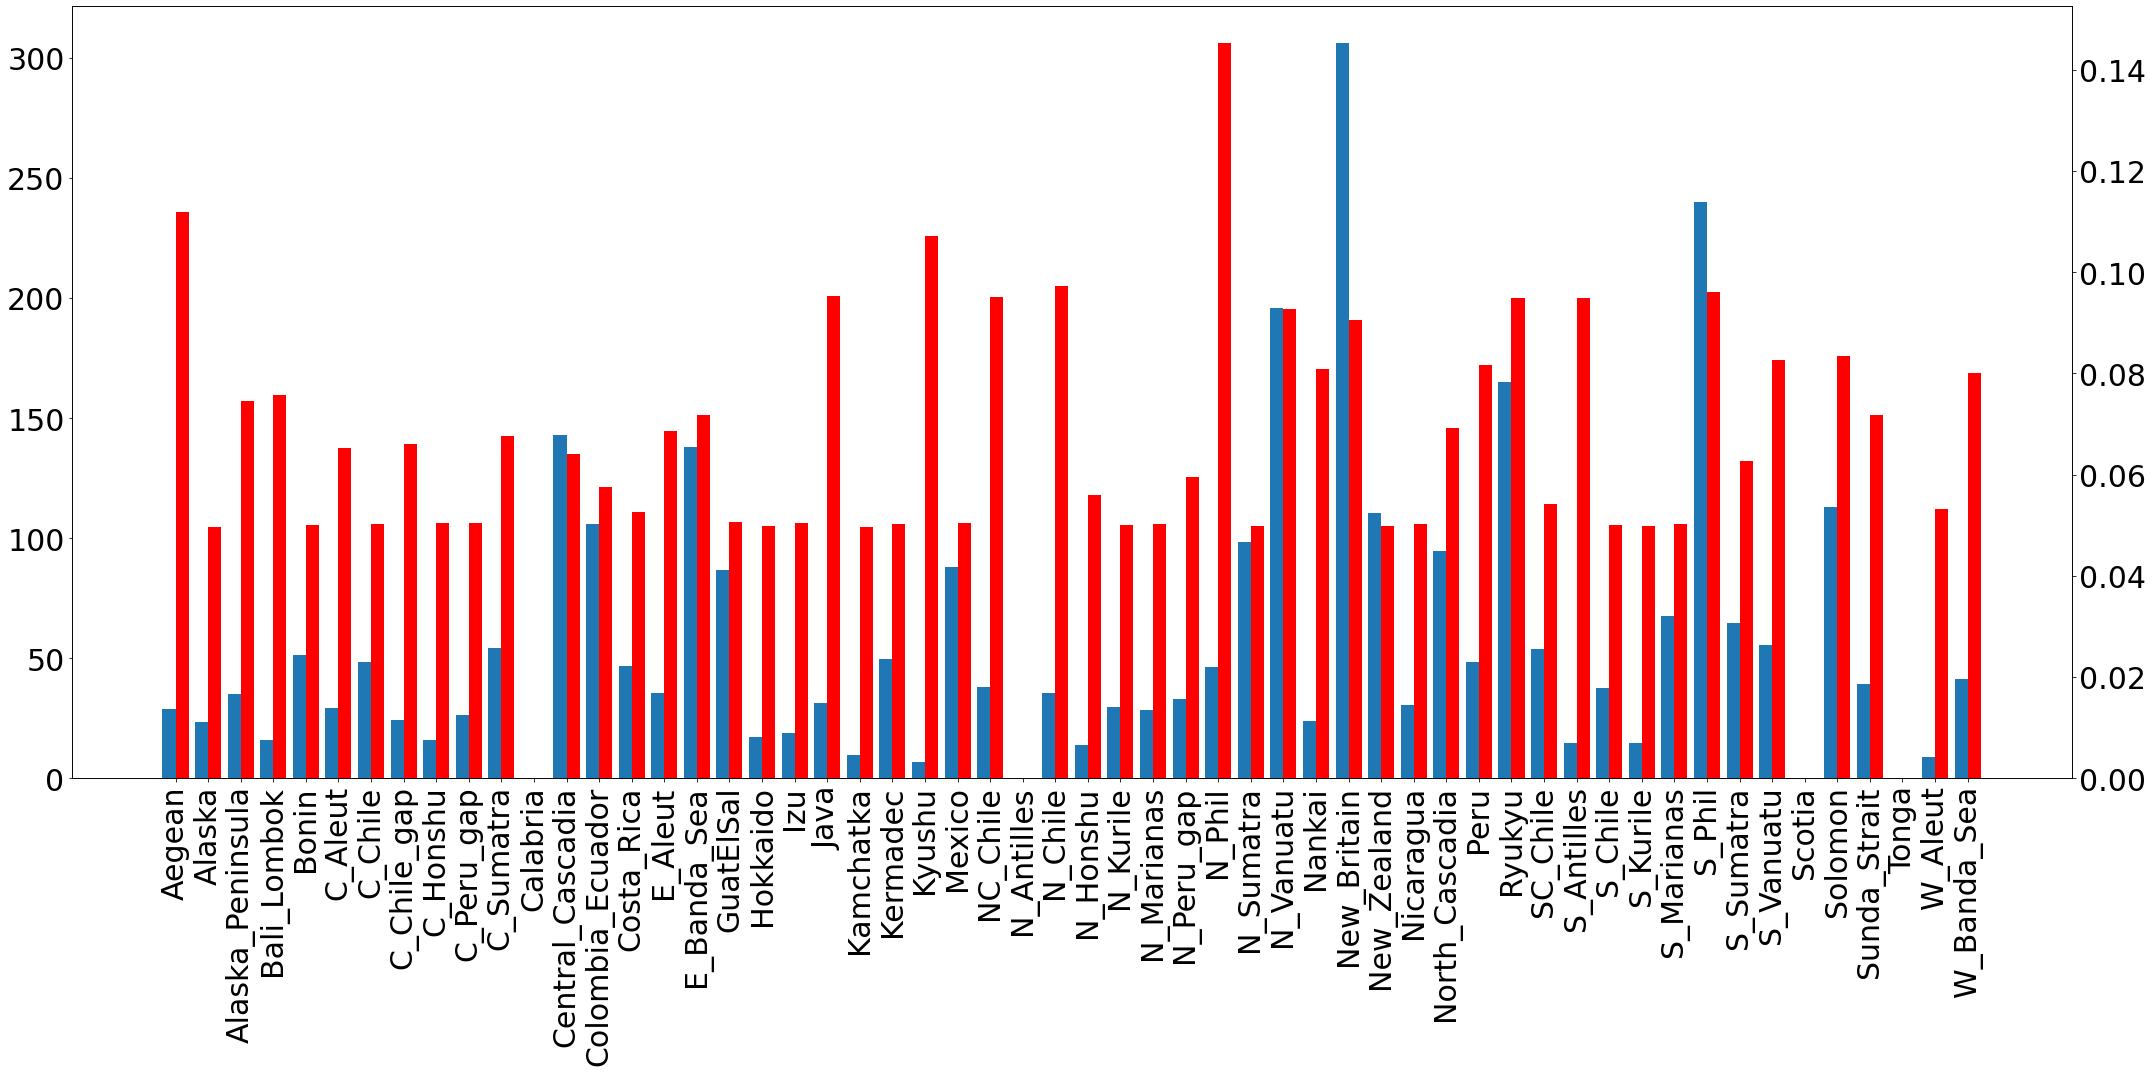

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,15))
x = np.arange(0,len(sum_perids_point),1)
ax2 = ax.twinx()
width=0.4
ax.bar(x-width, sum_perids_point, width=width, align='edge')
ax2.bar(x, perids_fraction, width=width, color='red', align='edge')
ax.set_xticks(x)#+width)
ax.set_xticklabels(sub_zones, rotation = 90, ha='center')
ax.tick_params(labelsize=30)
ax2.tick_params(labelsize=30)
plt.tight_layout()

In [50]:
results_df.style.background_gradient(cmap=cm.batlow)

,sub_zones,sub_sum_perid_point,sub_sum_perid_vol,sub_sum_perids_fraction
0,Aegean,28.838759,13510.761315,0.111935
1,Alaska,23.669594,9508.820318,0.049730
2,Alaska_Peninsula,35.071032,16808.705159,0.074469
3,Bali_Lombok,15.864812,14017.138830,0.075768
4,Bonin,51.218091,44841.961313,0.050113
5,C_Aleut,29.382445,16920.735420,0.065281
6,C_Chile,48.468492,37936.317240,0.050175
7,C_Chile_gap,24.537451,19461.474000,0.066022
8,C_Honshu,15.865969,13194.553318,0.050374
9,C_Peru_gap,26.484593,19093.402995,0.050447


In [51]:
#make some plots

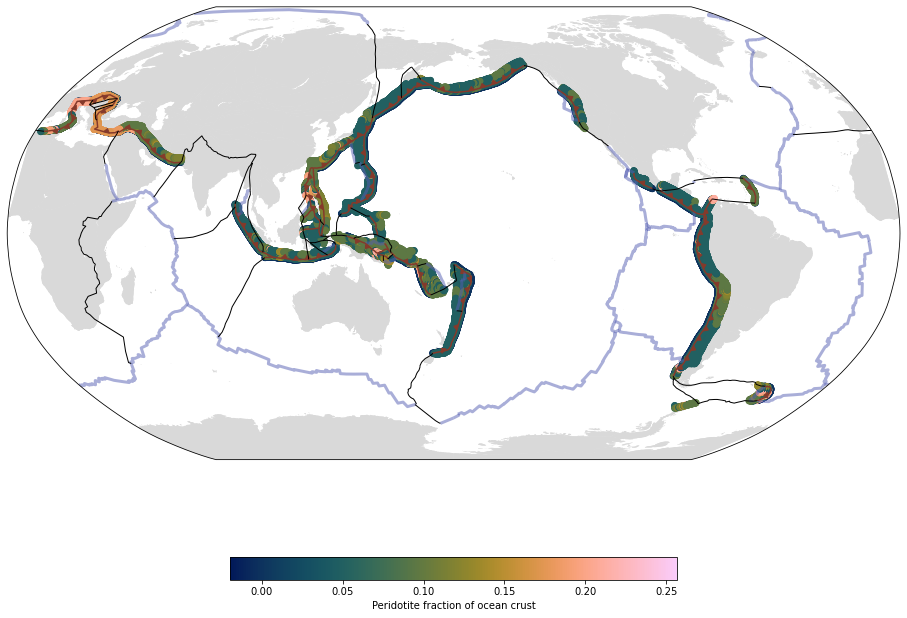

In [52]:
#plot 1, all RAP
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(111, projection=ccrs.Robinson(180))

#gplot.plot_continents(ax1, facecolor='0.8')
gplot.plot_coastlines(ax1, color='0.85')
gplot.plot_ridges_and_transforms(ax1, lw=3, alpha=0.5, color='#545EB3')
gplot.plot_trenches(ax1, color='#853a2b')
gplot.plot_misc_boundaries(ax1, lw=1, color='k')
gplot.plot_subduction_teeth(ax1, color='#853a2b')

sc = ax1.scatter(tracks['point_lats'].values,
                 tracks['point_lons'].values,
                 c=tracks['fractional_perids'].values,
                 transform=ccrs.PlateCarree(), cmap=cm.batlow)

fig.colorbar(sc, orientation='horizontal', shrink=0.5, label='Peridotite fraction of ocean crust')



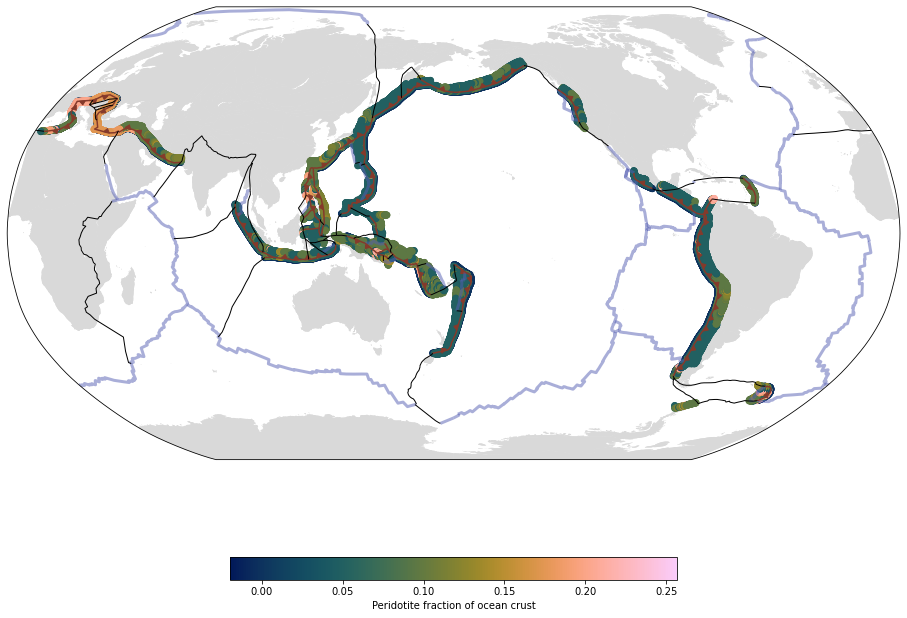

In [53]:
#plot 1, all RAP
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(111, projection=ccrs.Robinson(180))

#gplot.plot_continents(ax1, facecolor='0.8')
gplot.plot_coastlines(ax1, color='0.85')
gplot.plot_ridges_and_transforms(ax1, lw=3, alpha=0.5, color='#545EB3')
gplot.plot_trenches(ax1, color='#853a2b')
gplot.plot_misc_boundaries(ax1, lw=1, color='k')
gplot.plot_subduction_teeth(ax1, color='#853a2b')

sc = ax1.scatter(tracks['point_lats'].values,
                 tracks['point_lons'].values,
                 c=tracks['fractional_perids'].values,
                 transform=ccrs.PlateCarree(), cmap=cm.batlow)

fig.colorbar(sc, orientation='horizontal', shrink=0.5, label='Peridotite fraction of ocean crust')



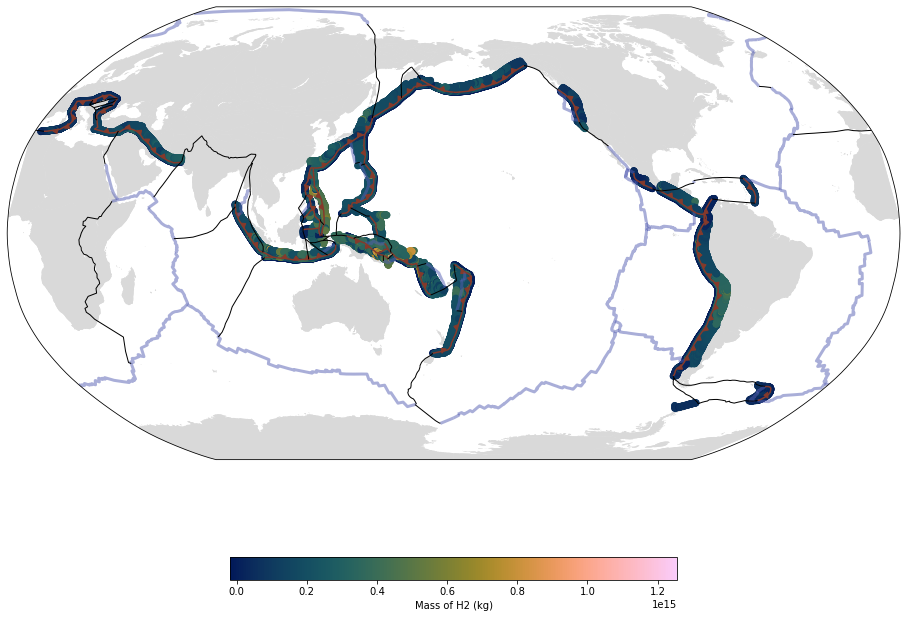

In [54]:
#plot 2, all RAP to H2
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(111, projection=ccrs.Robinson(180))

#gplot.plot_continents(ax1, facecolor='0.8')
gplot.plot_coastlines(ax1, color='0.85')
gplot.plot_ridges_and_transforms(ax1, lw=3, alpha=0.5, color='#545EB3')
gplot.plot_trenches(ax1, color='#853a2b')
gplot.plot_misc_boundaries(ax1, lw=1, color='k')
gplot.plot_subduction_teeth(ax1, color='#853a2b')

H2_mass = np.asarray(tracks['volume_perids'].values*perid_density_kg_km3*10e-2*1.00784*2)

sc = ax1.scatter(tracks['point_lats'].values,
                 tracks['point_lons'].values,
                 c=H2_mass,
                 transform=ccrs.PlateCarree(), cmap=cm.batlow)

fig.colorbar(sc, orientation='horizontal', shrink=0.5, label='Mass of H2 (kg)')



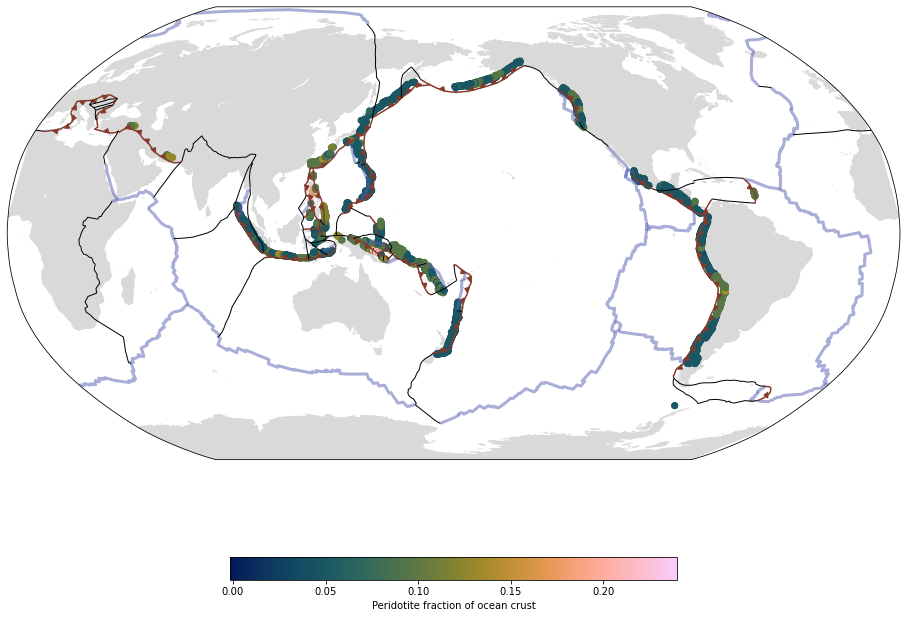

In [55]:
#Fig 3, RAP below antigorite
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(111, projection=ccrs.Robinson(180))

#gplot.plot_continents(ax1, facecolor='0.8')
gplot.plot_coastlines(ax1, color='0.85')
gplot.plot_ridges_and_transforms(ax1, lw=3, alpha=0.5, color='#545EB3')
gplot.plot_trenches(ax1, color='#853a2b')
gplot.plot_misc_boundaries(ax1, lw=1, color='k')
gplot.plot_subduction_teeth(ax1, color='#853a2b')

H2_mass = np.asarray(tracks_below_antigorite['volume_perids'].values*perid_density_kg_km3*10e-2*1.00784*2)

sc = ax1.scatter(tracks_below_antigorite['point_lats'],
                 tracks_below_antigorite['point_lons'],
                 c=tracks_below_antigorite['fractional_perids'],
                 transform=ccrs.PlateCarree(), cmap=cm.batlow)

fig.colorbar(sc, orientation='horizontal', shrink=0.5, label='Peridotite fraction of ocean crust')



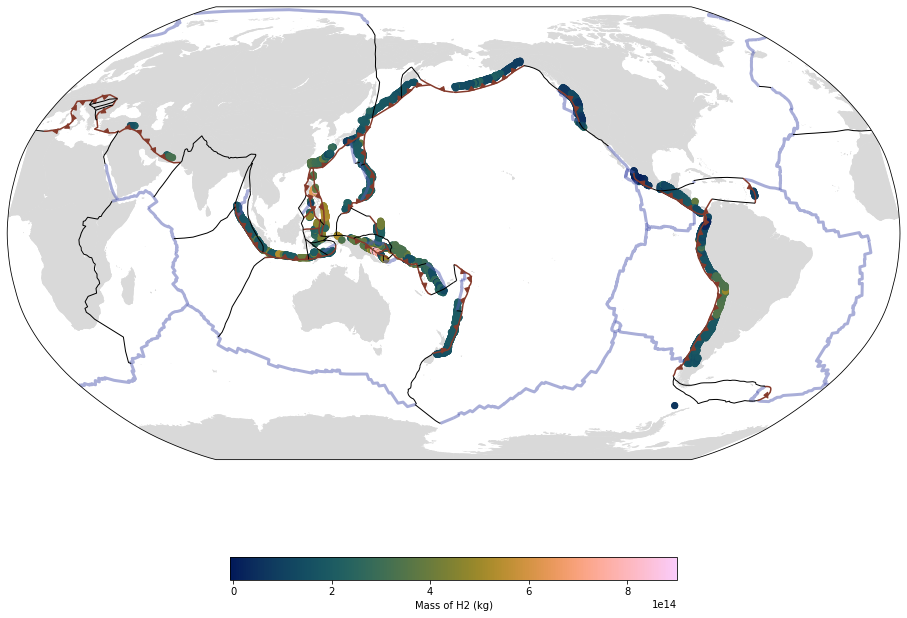

In [56]:
#Fig 4, RAP to H2 below antigorite
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(111, projection=ccrs.Robinson(180))

#gplot.plot_continents(ax1, facecolor='0.8')
gplot.plot_coastlines(ax1, color='0.85')
gplot.plot_ridges_and_transforms(ax1, lw=3, alpha=0.5, color='#545EB3')
gplot.plot_trenches(ax1, color='#853a2b')
gplot.plot_misc_boundaries(ax1, lw=1, color='k')
gplot.plot_subduction_teeth(ax1, color='#853a2b')

H2_mass = np.asarray(tracks_below_antigorite['volume_perids'].values*perid_density_kg_km3*10e-2*1.00784*2)

sc = ax1.scatter(tracks_below_antigorite['point_lats'],
                 tracks_below_antigorite['point_lons'],
                 c=H2_mass,
                 transform=ccrs.PlateCarree(), cmap=cm.batlow)

fig.colorbar(sc, orientation='horizontal', shrink=0.5, label='Mass of H2 (kg)')



NameError: name 'reconstructed_polygons' is not defined

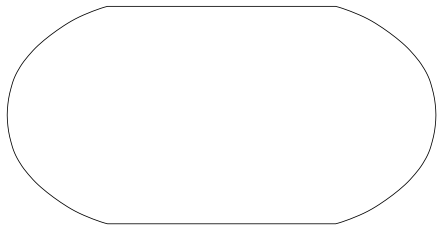

In [57]:
#get colour intervals
contour_levels=np.arange(0, 1.8e14, 2e13)
norm = BoundaryNorm(contour_levels, ncolors=cm.batlow.N, clip=True)

time = 0
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4),
                       subplot_kw={'projection': ccrs.Robinson(central_longitude=0)})

data_crs = ccrs.Geodetic()
poly_data_crs = ccrs.PlateCarree()
date_line_wrapper = pygplates.DateLineWrapper(0)

for polygon in reconstructed_polygons:
    poly_geom = pygplates.PolygonOnSphere(polygon.get_reconstructed_geometry())
    wrapped_polys = date_line_wrapper.wrap(poly_geom, 1)
    for wrapped_poly in wrapped_polys:
        wrapped_poly_lat = []
        wrapped_poly_lon = []
        for wrapped_poly_point in wrapped_poly.get_exterior_points():
            wrapped_poly_lat.append(wrapped_poly_point.get_latitude())
            wrapped_poly_lon.append(wrapped_poly_point.get_longitude())

        ax.plot(wrapped_poly_lon, wrapped_poly_lat, color='k', linewidth=0.5 ,zorder=0, alpha=0.5, transform=poly_data_crs)
        ax.fill(wrapped_poly_lon, wrapped_poly_lat, color='grey', alpha=0.5,
                linewidth=1 ,zorder=0, transform=poly_data_crs)
#for polygon in reconstructed_COBs:
#    poly_geom = pygplates.PolygonOnSphere(polygon.get_reconstructed_geometry())
#    wrapped_polys = date_line_wrapper.wrap(poly_geom, 1)
#    for wrapped_poly in wrapped_polys:
#        wrapped_poly_lat = []
#        wrapped_poly_lon = []
#        for wrapped_poly_point in wrapped_poly.get_exterior_points():
#            wrapped_poly_lat.append(wrapped_poly_point.get_latitude())
#            wrapped_poly_lon.append(wrapped_poly_point.get_longitude())
#
#        #ax.plot(wrapped_poly_lon, wrapped_poly_lat, color='k', linewidth=1 ,zorder=0, transform=poly_data_crs)
#        ax.fill(wrapped_poly_lon, wrapped_poly_lat, color='grey', alpha=0.5,
#                linewidth=1 ,zorder=0, transform=poly_data_crs)

for shared_boundary_section in shared_boundary_sections:
    if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='#545eb3',
                        linewidth=3, alpha=0.5, zorder=1, transform=data_crs)

    elif shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_subduction_zone:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='#853a2b',
                        linewidth=3, alpha=0.5, zorder=1, transform=data_crs)                
    else:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='k',
                        linewidth=1, alpha=0.5, zorder=1, transform=data_crs)

#flatten lists for plotting
#flat_sub_coords = [item for sublist in new_sub_coords for item in sublist]
flat_relevant_segments = [item for sublist in correct_segment_order for item in sublist]
flat_individual_track_perid_area_total = [item for sublist in individual_track_perid_area_total for item in sublist]
flat_individual_track_perid_total = [item for sublist in individual_track_perid_total for item in sublist]
#flat_sub_coords = [item for sublist in new_sub_coords for item in sublist]

#for plotting scatterplot               
#for ind, i in enumerate(flat_sub_coords):
#    cs = ax.scatter(i[0],i[1],c=np.nansum(flat_individual_track_perid_total[ind])*perid_density_kg_km3*10e-2/(1.00784*2), s=70, 
#                    zorder=2,vmin=1e15,vmax=1e16, transform=poly_data_crs, cmap=cm.batlow)#

#thank you nicky!!!
#ohhhhhhh 10e-2 is the moles of H2 generated per kg of rock from Alberto
H2_area = np.asarray(flat_individual_track_perid_area_total)*perid_density_kg_km3*10e-2*1.00784*2

s1 = LineCollection(flat_relevant_segments, array=H2_area,
                    cmap=cm.batlow, norm=norm, linewidths=8, transform=data_crs)#, rasterized=True)

line = ax.add_collection(s1)  # this is the actual plotting line!! Don't forget to include it.


cbar = fig.colorbar(line,  ax=ax, aspect=15, pad=0.01, ticks=contour_levels)
cbar.set_label('H2 (kg)', fontsize=20)
cbar.ax.tick_params(labelsize=16)

ax.set_global()
fig.suptitle('a', x=0.20,y=0.85, fontsize=40)

#plt.savefig('%sPresent_day_h2.pdf' % figuredir)#,  dpi=200)

In [ ]:
#get colour intervals
contour_levels=np.arange(0, 65, 5)
norm = BoundaryNorm(contour_levels, ncolors=cm.lajolla.N, clip=True)

time = 0
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4),
                       subplot_kw={'projection': ccrs.Robinson(central_longitude=0)})

data_crs = ccrs.Geodetic()
poly_data_crs = ccrs.PlateCarree()
date_line_wrapper = pygplates.DateLineWrapper(0)

for polygon in reconstructed_polygons:
    poly_geom = pygplates.PolygonOnSphere(polygon.get_reconstructed_geometry())
    wrapped_polys = date_line_wrapper.wrap(poly_geom, 1)
    for wrapped_poly in wrapped_polys:
        wrapped_poly_lat = []
        wrapped_poly_lon = []
        for wrapped_poly_point in wrapped_poly.get_exterior_points():
            wrapped_poly_lat.append(wrapped_poly_point.get_latitude())
            wrapped_poly_lon.append(wrapped_poly_point.get_longitude())

        ax.plot(wrapped_poly_lon, wrapped_poly_lat, color='k', linewidth=0.5 ,zorder=0, alpha=0.5, transform=poly_data_crs)
#        ax.fill(wrapped_poly_lon, wrapped_poly_lat, color='grey', alpha=0.5,
#                linewidth=1 ,zorder=0, transform=poly_data_crs)
#for polygon in reconstructed_COBs:
#    poly_geom = pygplates.PolygonOnSphere(polygon.get_reconstructed_geometry())
#    wrapped_polys = date_line_wrapper.wrap(poly_geom, 1)
#    for wrapped_poly in wrapped_polys:
#        wrapped_poly_lat = []
#        wrapped_poly_lon = []
#        for wrapped_poly_point in wrapped_poly.get_exterior_points():
#            wrapped_poly_lat.append(wrapped_poly_point.get_latitude())
#            wrapped_poly_lon.append(wrapped_poly_point.get_longitude())
#
#        #ax.plot(wrapped_poly_lon, wrapped_poly_lat, color='k', linewidth=1 ,zorder=0, transform=poly_data_crs)
#        ax.fill(wrapped_poly_lon, wrapped_poly_lat, color='grey', alpha=0.5,
#                linewidth=1 ,zorder=0, transform=poly_data_crs)

for shared_boundary_section in shared_boundary_sections:
    if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='#545eb3',
                        linewidth=3, alpha=0.5, zorder=1, transform=data_crs)

    elif shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_subduction_zone:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='#853a2b',
                        linewidth=3, alpha=0.5, zorder=1, transform=data_crs)                
    else:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='k',
                        linewidth=1, alpha=0.5, zorder=1, transform=data_crs)

#flatten lists for plotting
#flat_sub_coords = [item for sublist in new_sub_coords for item in sublist]
flat_relevant_segments = [item for sublist in correct_segment_order for item in sublist]
flat_individual_track_dip_all = [item for sublist in individual_track_dip_all for item in sublist]

#for scatterplot plotting
#for ind, i in enumerate(flat_sub_coords):
#    cs = ax.scatter(i[0],i[1],c=np.nansum(flat_individual_track_dip_all[ind]), s=100, 
#                    zorder=2,vmin=0,vmax=60, transform=poly_data_crs, cmap=cm.batlow)#

#thank you nicky!!!
s1 = LineCollection(flat_relevant_segments, array=(np.asarray(flat_individual_track_dip_all)),
                    cmap=cm.lajolla, norm=norm, linewidths=8, transform=data_crs)#, rasterized=True)

line = ax.add_collection(s1)  # this is the actual plotting line!! Don't forget to include it.


cbar = fig.colorbar(line,  ax=ax, aspect=15, pad=0.01, ticks=contour_levels)
cbar.set_label('dip (°)', fontsize=20)
cbar.ax.tick_params(labelsize=16)

ax.set_global()

fig.suptitle('b', x=0.20,y=0.85, fontsize=40)

ax.set_global()

#plt.savefig('%sPresent_day_dip.pdf' % figuredir)#,  dpi=200)

In [ ]:
#some densities
perid_density_g_cm3 = 3.3 #g/cm3
perid_density_g_km3 = perid_density_g_cm3 * 100000**3
perid_density_kg_km3 = perid_density_g_km3 * 1e-3

In [ ]:
#total perid calculations, this is less than in the antigorite notebook because... :
total_perid = np.sum(tracks['volume_perids'].values)
total_perid/1000000/5

1.8391043692684108

In [62]:
#total h2 calculations
#H2 is total moles 
H2_kg_per_m3 = 0.2
H2_kg_per_km3 = H2_kg_per_m3 * 1e9
total_peridotite_volume = np.sum(tracks_below_antigorite['volume_perids'].values)
#H2_total_moles = np.sum(tracks['volume_perids'].values)*perid_density_kg_km3*10e-2
H2_kg = H2_kg_per_km3 * total_peridotite_volume

H2_total_MT = H2_kg * 1e-9
H2_total_MT/1000000/5

0.08986744517684866

In [61]:
np.sum(tracks_below_antigorite['volume_perids'])

2246686.1294212164

In [25]:
#seafloor consumption of east et al. 2019 for last 5 Ma (rough)
area_km2_per_1Ma = 3000000
ocean_crust_thickness = 6
ocean_crust_flux_per_1Ma = area_km2_per_1Ma * ocean_crust_thickness
our_RAP_vol_per_5Ma = np.sum(tracks['volume_perids'].values)
print(ocean_crust_flux_per_1Ma)
print(our_RAP_vol_per_5Ma)

18000000
9195521.846342053


In [24]:
#mantle hydration Faccenda
conv_area = 2.7 #km2
min_penetration = 5
max_penetration = 10

#in km3
mantle_perid_volume_min = conv_area*min_penetration
mantle_perid_volume_max = conv_area*max_penetration

#to hydrogen (10e-2 from alberto's work)
mantle_H2_total_moles = mantle_perid_volume_max*10e-2*perid_density_kg_km3*10e-2
mantle_H2_total_kg = mantle_H2_total_moles *1.00784*2
mantle_H2_total_MT = mantle_H2_total_kg * 1e-9
mantle_H2_total_MT

1795.9708800000003

In [ ]:
mantle_H2_total_kg

In [ ]:
897985440000.0001
1795970880000.0002

In [ ]:
mantle_perid_volume_max/1.3

In [ ]:
#seafloor Production worman
SP_slow = 1.6 * 32300* 24
slow = 4 * 32300* 24
SP_fast = .5 * 28700* 76 
fast = 6 * 28700* 76

In [ ]:
SP_slow/(slow+fast)

In [ ]:
(SP_slow+SP_fast)/(slow+fast)*100

In [ ]:
np.sum(res)*perid_density_kg_km3*10e-2/(1.00784*2)/5/1000000

In [ ]:
4e-2/1.00784*2

In [29]:
np.sum(tracks_below_antigorite['volume_perids'].values)

7107881.6449799575

In [ ]:
#convert to alberto
#15wt%
total_water_in_antigorite_kg = 0.15 * perid_density_kg_km3 * np.sum(flat_individual_track_perid_total)
total_water_to_react_kg3 = total_water_in_antigorite_kg
total_perid_to_react = total_water_to_react_kg3
#assumes 1:1 fluid:rock
#assumes for each kg of reactant upper and lower value are how much H2 is formed
upper_value_moles = 4e-2 # mol 
lower_value_moles = 1.5e-3 # mol
upper_value_kg = 4e-2 * 1.00784 * 2 / 1000
lower_value_kg = 1.5e-3 * 1.00784 * 2 / 1000
upper_total_H2_kg = upper_value_kg * total_perid_to_react
lower_total_H2_kg = lower_value_kg * total_perid_to_react
upper_total_H2_MT = upper_total_H2_kg / 1000000000
lower_total_H2_MT = lower_total_H2_kg / 1000000000
upper_total_H2_moles = upper_value_moles * total_perid_to_react
lower_total_H2_moles = lower_value_moles * total_perid_to_react
print('water (kg)',total_water_to_react_kg3)
print('upper H2 (kg per 5 Ma)', upper_total_H2_kg)
print('lower H2 (kg per 5 Ma)', lower_total_H2_kg)
print('upper H2 (MT per 5 Ma)', upper_total_H2_MT)
print('lower H2 (MT per 5 Ma)', lower_total_H2_MT)
print('upper H2 (kg per a)', upper_total_H2_kg/1000000/5)
print('lower H2 (kg per a)', lower_total_H2_kg/1000000/5)
print('upper H2 (MT per a)', upper_total_H2_MT/1000000/5)
print('lower H2 (MT per a)', lower_total_H2_MT/1000000/5)

In [ ]:
1879547.2165944458

In [ ]:
4e-2*total_water_in_antigorite_kg/1000000/5/1000000000

In [ ]:
3.65e-2*1.00784*2

In [ ]:
#5.5e10
#2.1e9

In [ ]:
693744605839.4714
total_water_to_react_kg3/1000000/5

In [ ]:
3.3e12*4e-2/1000000000

In [ ]:
3.3e12*0.04

In [ ]:
perid_density_kg_km3 * np.sum(flat_individual_track_perid_total)

In [ ]:
2e-2

In [ ]:
#vitale brovarone 2017 comparison
H2_VB17_MT_a = 0.8
H2_VB17_kg_a = H2_VB17_MT_a * 1e9
H2_VB17_kg_a



In [ ]:
import xarray as xr
lat_results = []
lon_results = []
H2_vals = []
for ind, i in enumerate(flat_sub_coords):
    lat_results.append(i[1])
    lon_results.append(i[0])
    H2_vals.append(flat_individual_track_perid_total[ind]*perid_density_kg_km3*10e-2/(1.00784*2))
lat_results = np.asarray(lat_results)
lon_results = np.asarray(lon_results)

H2_vals = np.asarray(H2_vals)

df = pd.DataFrame({'H2':H2_vals, 'lat':lat_results, 'lon':lon_results})
df_pv = df.pivot(index='lat', columns='lon')
df_pv = df_pv.droplevel(0, axis=1)

da = xr.DataArray(data=df_pv)

da.plot.pcolormesh(figsize=(24,8))

In [ ]:
da

In [ ]:
test_da = da.coarsen(lat=4).mean().coarsen(lon=4).mean()


In [ ]:
test_da.plot.pcolormesh(figsize=(16,8))

In [ ]:
np.sum(da)